In [1]:
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# f_in = glob('./output/*/input_params.txt')
f_out = glob('./output/*/*/*/*/*_out.txt')
arr = np.zeros(())
for i in range(len(f_out)):
    split = f_out[i].split('/')
    split1 = split[-1].split('_')
    in_fname = split[0] + '/' + split[1] + '/' + split[2] + '/' + \
                split[3] + '/' + split[4] + '/' + split[5] + '/'+ split1[0] + '_in.txt'
    arr_in = np.loadtxt(in_fname, skiprows=1)
    arr_out = np.loadtxt(f_out[i], skiprows=1)
#     arr_in[0] = int(split[2])
#     arr_in[2] = int(split[4])
    if i == 0:
        arr = np.concatenate((arr_in, arr_out))
    else:
        arr = np.vstack((arr, np.concatenate((arr_in, arr_out))))

In [3]:
df = pd.DataFrame(arr, columns = ('star_n', 'streak_n', 'star_snr', 'streak_snr', 'seed', 'true_pos', 'false_pos'))
df["star_n"] = df["star_n"].astype(int)
df["streak_n"] = df["streak_n"].astype(int)
df["seed"] = df["seed"].astype(int)
df.dtypes

star_n          int64
streak_n        int64
star_snr      float64
streak_snr    float64
seed            int64
true_pos      float64
false_pos     float64
dtype: object

In [4]:
df

,star_n,streak_n,star_snr,streak_snr,seed,true_pos,false_pos
0,10000,5,100.0,0.5,0,0.0816,0.0014
1,10000,5,100.0,100.0,0,1.0000,0.0145
2,10000,5,100.0,10000.0,0,1.0000,0.0149
3,10000,5,100.0,1000.0,0,1.0000,0.0149
4,10000,5,100.0,10.0,0,1.0000,0.0143
...,...,...,...,...,...,...,...
103,100000,1,1000.0,100.0,0,1.0000,0.0058
104,100000,1,1000.0,10000.0,0,1.0000,0.0067
105,100000,1,1000.0,1000.0,0,1.0000,0.0077
106,100000,1,1000.0,10.0,0,1.0000,0.0058


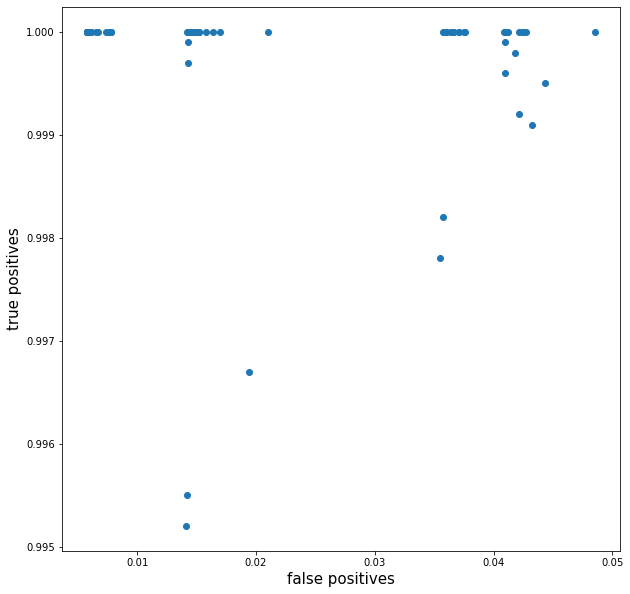

In [5]:
plt.figure(figsize = (10,10))
plt.scatter(df[df['streak_snr'] >= 1.]['false_pos'],df[df['streak_snr'] > 0.5]['true_pos'])
# plt.scatter(df['false_pos'],df['true_pos'])
plt.xlabel('false positives', fontsize=15)
plt.ylabel('true positives', fontsize=15)
# plt.colorbar()
plt.show()

#test shorter streaks
#test for LAST images (number of stars, std, mean)


/home/azenin/Software/miniconda3/envs/last/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


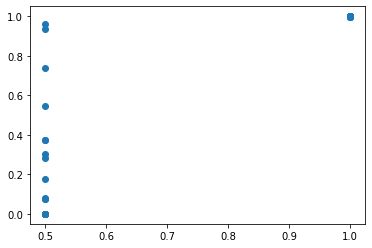

In [6]:
sdf = df[df["streak_snr"] <= 1]
sdf.sort_values(by=['true_pos'], inplace=True, ascending=False)
# sdf = sdf[sdf["star_snr"] < 100]
# sdf = sdf[sdf["streak_n"] == 1]
sdf
plt.scatter(sdf['streak_snr'], sdf['true_pos'])